In [1]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

# 3. Modelo Simplificado

## a)

Dado que $\theta(x,t) = v_s(x)u(x,t)$. Para la primera ecuación:
\begin{align*}
0=\theta_t(x,t) +v_s(x)\theta_x(x,t) \Leftrightarrow 0=v_s(x)u_t(x,t) + v_s(x)(u(x,t)v_s(x))_x
\underbrace{\Leftrightarrow}_{v_s(x)\not=0} 0=u_t(x,t) + (v_s(x)u(x,t))_x
\end{align*}

Para la segunda: 
\begin{equation}
\theta(x,0) = v_s(x)e^{-\frac{|x-10|^2}{25}} \Leftrightarrow v_s(x)u(x,0) = v_s(x))e^{-\frac{|x-10|^2}{25}} \underbrace{\Leftrightarrow}_{v_s(x)\not=0} u(x,0) = e^{-\frac{|x-10|^2}{25}}
\end{equation}

Para la tercera ecuación: 
\begin{equation}
\theta(0,t) = 7 \Leftrightarrow v_s(0)u(0,t) = 7 \underbrace{\Leftrightarrow}_{v_s(0)=70} u(0,t) = 7/70 = 0.1
\end{equation}

## b)

Let $\gamma(s):= (x(s),t(s))$. We will solve for $\theta(\gamma(s)) = \theta(x(s), t(s))$. Derivamos con respecto a $s$:
\begin{equation}
\frac{d}{ds}\theta(\gamma(s)) = \theta_x(\gamma(s))x'(s) + \theta_t(\gamma(s))t'(s)
\end{equation}

For $x\leq 50$: 
\begin{equation}
    \begin{cases}
    t'(s)=1\\
    x'(s)=v_s(x(s)) = 70
    \end{cases}
\Rightarrow
\begin{cases}
    t(s) = t_0 + s \\
    x(s) = 70s + x_0
    \end{cases}
\end{equation}

\begin{equation}
\theta(\gamma(s)) \equiv \text{cte} \Rightarrow \theta(\gamma(-t_0)) = \theta(x_0 - 70t_0, 0) = v_s(x_0-70t_0) e^{-\frac{|x_0-70t_0 -10|^2}{25}} 
\end{equation}

For $x\geq 60$: 
\begin{equation}
    \begin{cases}
    t'(s)=1\\
    x'(s)=v_s(x(s)) = 120
    \end{cases}
\Rightarrow
\begin{cases}
    t(s) = t_0 + s \\
    x(s) = 120s + x_0
    \end{cases}
\end{equation}

\begin{equation}
\theta(\gamma(s)) \equiv \text{cte} \Rightarrow \theta(\gamma(-t_0)) = \theta(x_0 - 120t_0, 0) = v_s(x_0-120t_0) e^{-\frac{|x_0-120t_0 -10|^2}{25}} 
\end{equation}

For $50\leq x\leq 60$: 
\begin{equation}
    \begin{cases}
    t'(s)=1\\
    x'(s)=v_s(x(s)) = 70+50(1-(60-x)/10) = 5x-180
    \end{cases}
\Rightarrow
\begin{cases}
    t(s) = t_0 + s \\
    x(s) = 36+c_1 e^{5s}
    \end{cases}
\Rightarrow
\begin{cases}
    t(s) = t_0 + s \\
    x(s) = 36+(x_0-36) e^{5s}
    \end{cases}
\end{equation}

\begin{equation}
\theta(\gamma(s)) \equiv \text{cte} \Rightarrow \theta(\gamma(-t_0)) = \theta(36+(x_0-36)e^{-5t_0}, 0) = v_s(36+(x_0-36) e^{-5t_0}) \exp\left\{-\frac{|36+(x_0-36) e^{-5t_0} -10|^2}{25}\right\} 
\end{equation}

In [2]:
x = np.linspace(0,100, 100+1)
s = np.linspace(0,10, 1000) 

In [3]:
gamma_1 = lambda x0, s: (70*s+x0, s)
gamma_3 = lambda x0, s: (120*s+x0, s)
gamma_2 = lambda x0, s: (36+(x0-36)*np.exp(5*s),s)

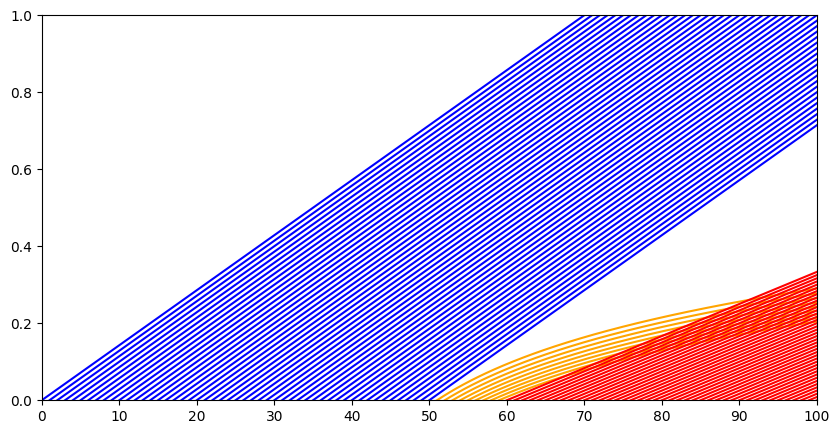

In [4]:
fig, ax = plt.subplots(1, figsize=(10,5))
for xi in x:
    if xi<=50:
        xs, ts = gamma_1(xi, s)
        ax.plot(xs, ts, c='b')
    elif xi>=60:
        xs, ts = gamma_3(xi, s)
        ax.plot(xs, ts, c='r')
    else:
        xs, ts = gamma_2(xi, s)
        ax.plot(xs, ts, c='orange')

ax.set_xlim(0,100)
ax.set_ylim(0,1)
ax.set_xticks(np.arange(0,101,10))
plt.show()

Observamos que se intersecan las curvas características resultantes de la segunda (naranja) y tercera (roja):

## c)

In [5]:
x_intervalo = (0, 100)
t_intervalo = (0, 1)

In [6]:
Nx = 100
Nt = 100

dx = (x_intervalo[1] - x_intervalo[0])/Nx
dt = (t_intervalo[1] - t_intervalo[0])/Nt

In [7]:
x = np.linspace(*x_intervalo, Nx+1)
t = np.linspace(*t_intervalo, Nt+1)

In [8]:
v_s = lambda x: np.where(x<=50, 70, 0) + np.where(x>=60, 120, 0) + np.where((x>50) & (x<60), 70+50*(1-(60-x)/10), 0)

theta_x0 = lambda x: v_s(x)*np.exp(-np.square(x-10)/25)
theta_0t = lambda t: 7

In [9]:
X, T = np.meshgrid(x, t)
theta = np.zeros((Nt+1, Nx+1))

In [10]:
theta[0] = theta_x0(x)
theta[:, 0] = theta_0t(t)
a = v_s(x)

A = np.diag(1 - dt*a/dx, 0) + np.diag(dt*a[1:]/dx, -1)
for i in range(1, len(t)):
    theta[i][1:] = np.dot(A, theta[i-1])[1:]

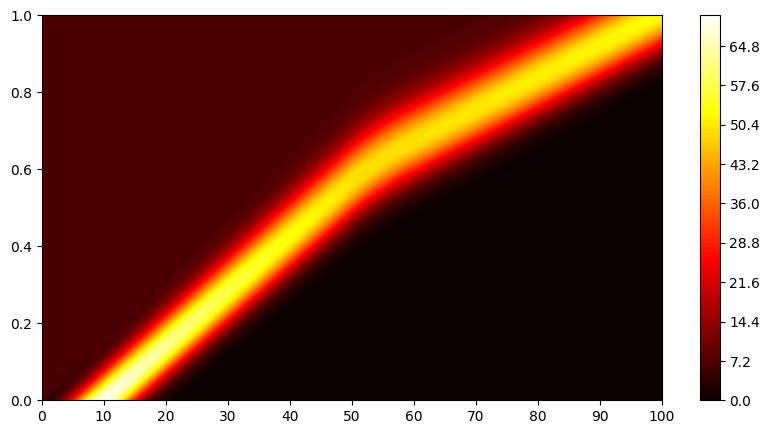

In [11]:
fig, ax = plt.subplots(1, figsize=(10,5))
im = ax.contourf(X, T, theta, cmap='hot', levels=100)
fig.colorbar(im)
ax.set_xticks(np.arange(0,101,10))
plt.show()

## d)

Sí, tiene sentido. Nos fijamos que las curvas características coinciden con las curvas de nivel del resultado numérico.

## e)

In [12]:
Nx = 200
Nt = 100

dx = (x_intervalo[1] - x_intervalo[0])/Nx
dt = (t_intervalo[1] - t_intervalo[0])/Nt

x = np.linspace(*x_intervalo, Nx+1)
t = np.linspace(*t_intervalo, Nt+1)

X, T = np.meshgrid(x, t)
theta = np.zeros((Nt+1, Nx+1))

In [13]:
theta[0] = theta_x0(x)
theta[:, 0] = theta_0t(t)
a = v_s(x)

A = np.diag(1 - dt*a/dx, 0) + np.diag(dt*a[1:]/dx, -1)
for i in range(1, len(t)):
    theta[i][1:] = np.dot(A, theta[i-1])[1:]

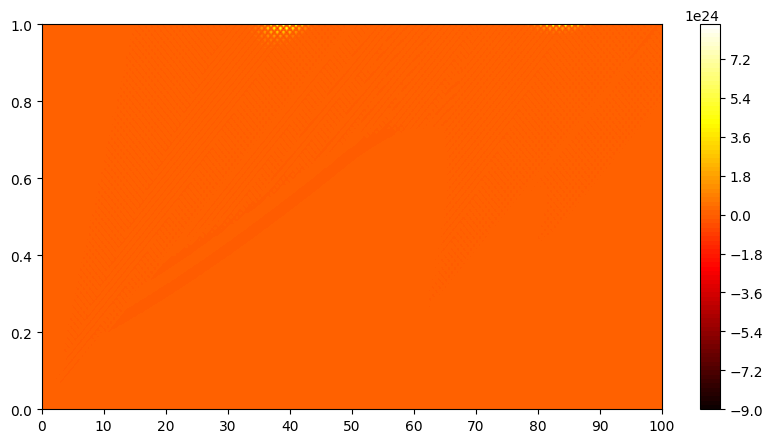

In [14]:
fig, ax = plt.subplots(1, figsize=(10,5))
im = ax.contourf(X, T, theta, cmap='hot', levels=100)
fig.colorbar(im)
ax.set_xticks(np.arange(0,101,10))
plt.show()

Observamos que la solución explota y se debe a que el equema viaja más rápido que la solución.

## f)

Sabmos que $u(x,t) = \theta(x,t)/v_s(x)$. Entonces:

Para $x\leq 50$:

\begin{equation}
u(x_0, t_0) =
\begin{cases}
e^{-\frac{|x_0-70t_0 -10|^2}{25}}  & \text{If } x_0-70t_0\leq 50\\
e^{-\frac{|x_0-120t_0 -10|^2}{25}} & \text{If } x_0-120t_0\geq 60\\
\exp\left\{-\frac{|36+(x_0-36) e^{-5t_0} -10|^2}{25}\right\} & \text{If } 50\leq 36+(x_0-36)e^{-5t_0}\leq 60\\
\end{cases}
\end{equation}

In [15]:
Nx = 1000
Nt = 1000

x = np.linspace(*x_intervalo, Nx+1)
t = np.linspace(*t_intervalo, Nt+1)

X, T = np.meshgrid(x, t)

In [16]:
u = np.zeros((Nt+1, Nx+1))

u += np.where(X - 70 <= 50, np.exp(-np.square(X-70*T-10)/25), 0)
u += np.where(X - 120 >= 60, np.exp(-np.square(X-120*T-10)/25), 0)
M = 36+(X-36)*np.exp(-5*T)
u += np.where((50<=M) & (M<=60), np.exp(-np.square(36+(X-36)*np.exp(-5*T)-10)/25), 0)

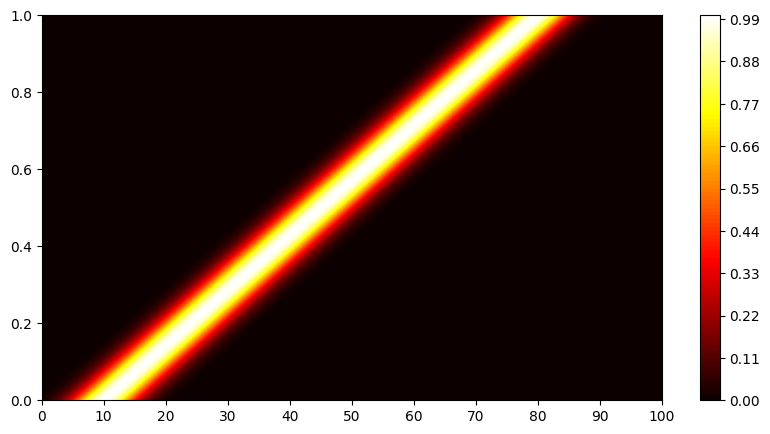

In [17]:
fig, ax = plt.subplots(1, figsize=(10,5))
im = ax.contourf(X, T, u, cmap='hot', levels=100)
fig.colorbar(im)
ax.set_xticks(np.arange(0,101,10))
plt.show()

In [18]:
fig = plt.figure()
camera = Camera(fig)
for i in range(len(t)):
    if i%20==0:
        ax = plt.plot(x, u[i], c='black')
        plt.legend(ax, [f"t = {t[i]:.02f}"], loc='upper right')
        plt.ylabel('u (coches/$\Delta x$)')
        plt.xlabel('x')
        camera.snap()
animation = camera.animate(interval=1)
animation.save('animation1.gif')
plt.close()

MovieWriter ffmpeg unavailable; using Pillow instead.


# 4. Modelo no lineal

## g)

Tenemos que $u_t + 120(1-2u)u_x = 0$. Entonces se tiene que cumplir:
\begin{equation}
\begin{cases}
x'(s) = 120(1-2u)\\
t'(s) = 1
\end{cases}
\end{equation}

\begin{equation}
x'(s) = 120(1-2u(x(s), t(s)) = 120(1-2u(x(0),t(0))) = 120(1-2u_0(x_0))
\end{equation}

Entonces tenemos:
\begin{equation}
\begin{cases}
x(s) = x_0 + 120(1-2u_0(x_0)) s\\
t(s) = s
\end{cases}
\end{equation}

In [49]:
x = np.linspace(0,100, 100+1)
s = np.linspace(0,10, 1000) 

In [50]:
u_0x = lambda x: 0.2 + 0.5*np.exp(-np.square((x-50)/30))
gamma_nolineal = lambda x0, s: (x0 + s*120*(1-2*u_0x(x0)), s)

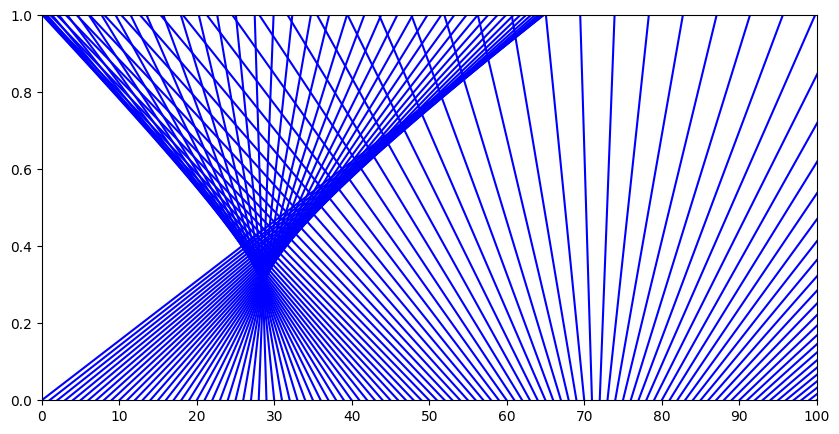

In [51]:
fig, ax = plt.subplots(1, figsize=(10,5))
for xi in x:
    xs, ts = gamma_nolineal(xi, s)
    ax.plot(xs, ts, c='b')

ax.set_xlim(0,100)
ax.set_ylim(0,1)
ax.set_xticks(np.arange(0,101,10))
plt.show()

Se oberva en el gráfico como las curvas característica se cortan.

## h)

In [19]:
x_lim = (0, 100)
t_lim = (0, 2.5)

In [20]:
dx = 0.2
dt = dx/120

In [21]:
x = np.linspace(*x_lim, int((x_lim[1]-x_lim[0])/dx + 1))
t = np.linspace(*t_lim, int((t_lim[1]-t_lim[0])/dt + 1))
X,T = np.meshgrid(x,t)

In [22]:
f = lambda u: 120*u*(1-u)

u_0t = lambda t: 0.2
u_100t = lambda t: 0.2
u_x0 = lambda x: 0.2 + 0.5*np.exp(-np.square(np.abs(x-50)/30))

In [23]:
u = np.zeros((len(t),len(x)))
u[0] = u_x0(x)
u[:,0] = u_0t(t)
u[:,-1] = u_100t(t)

In [24]:
for i in range(1, len(t)):
    f_i = f(u[i-1])
    u[i,1:-1] = ( (u[i-1,0:-2] + u[i-1,2:]) + (f_i[2:]-f_i[:-2])*dt/dx )/2

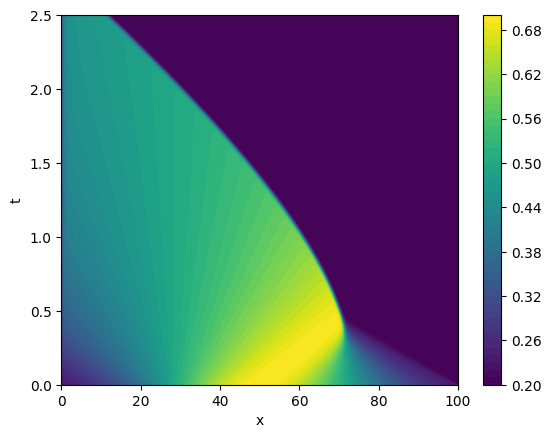

In [25]:
plt.contourf(X,T,u, levels=50)
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()

In [26]:
fig = plt.figure()
camera = Camera(fig)
for i in range(len(t)):
    if i%10==0:
        ax = plt.plot(x, u[i], c='black')
        plt.legend(ax, [f"t = {int(t[i]):02d}h {int(60*(t[i]%1)):02d}min"], loc='upper right')
        plt.ylabel('u (coches/$\Delta x$)')
        plt.xlabel('x')
        camera.snap()
animation = camera.animate(interval=1)
animation.save('animation2.gif')
plt.close()

MovieWriter ffmpeg unavailable; using Pillow instead.


## i)

Podemos ver en el video que el atasco avanza en dirección contraria en la que avanzan los coches (efecto acordeón). Además, vemos que tras el atasco no hay apenas densidad de coches (se disipa casi completamente). Observamos que tiene sentido físico con lo que ocurre en un atasco real.

## j)

Más o menos se produce a los 30 minutos (0.5 horas), justo cuando se pone casi vertical. En el plot de contorno se ve tambien que en ese momento hay una "anomalía".

Sí, coincide con lo que hemos visto en clase de las curvas características. El momento en que la "ola va a romper" es el momento de discontinuidad y en el que intersecan las curvas características.

## k)

En el límite de la derecha tenemos la condición frontera $u(100,0)=0.2$. El cual limita la mínima densidad posible después del atasco.